In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296) 
  
# data (as pandas dataframes) 
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features 
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets 
  
# metadata 
print(diabetes_130_us_hospitals_for_years_1999_2008.metadata) 
  
# variable information 
print(diabetes_130_us_hospitals_for_years_1999_2008.variables) 

{'uci_id': 296, 'name': 'Diabetes 130-US hospitals for years 1999-2008', 'repository_url': 'https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008', 'data_url': 'https://archive.ics.uci.edu/static/public/296/data.csv', 'abstract': 'The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. The goal is to determine the early readmission of the patient within 30 days of discharge.\nThe problem is important for the following reasons. Despite high-quality evidence showing improved clinical outcomes for diabetic patients who receive various preventive and therapeutic interventions, many patients do not receive them. This can be partially attributed to arbitrary diabetes management in hospital environments, which fail to attend to glycemic control. Failure to provide pro

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


### Pre-Processing

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D, proj3d
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
X

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,...,No,No,Up,No,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,...,No,No,Steady,No,No,No,No,No,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,[70-80),NaN,1,3,7,3,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101762,AfricanAmerican,Female,[80-90),NaN,1,4,5,5,MC,NaN,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,[70-80),NaN,1,1,7,1,MC,NaN,...,No,No,Down,No,No,No,No,No,Ch,Yes
101764,Caucasian,Female,[80-90),NaN,2,3,7,10,MC,Surgery-General,...,No,No,Up,No,No,No,No,No,Ch,Yes


In [5]:
y

,readmitted
0,NO
1,>30
2,NO
3,NO
4,NO
...,...
101761,>30
101762,NO
101763,NO
101764,NO


In [6]:
data = X.copy(deep=True)
y = data['diabetesMed']

In [7]:
data.isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

In [8]:
y.isnull().sum()

0

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
data = pd.get_dummies(data, columns=['race'], prefix='race')

In [12]:
data = pd.get_dummies(data, columns=['age'], prefix='age') #sections, 0-10, 10-20, ...

In [13]:
data = pd.get_dummies(data, columns=['gender'], prefix='gender') #'Female', 'Male', 'Unknown/Invalid'

In [14]:
data = pd.get_dummies(data, columns=['metformin'], prefix='metformin') #it was no, steady , up or down for usage 

In [15]:
data = pd.get_dummies(data, columns=['A1Cresult'], prefix='A1Cresult')#measures blood sugar, none if not conducted, >8% , >7% and norm

In [16]:
data = pd.get_dummies(data, columns=['max_glu_serum'], prefix='max_glu_serum')#'None', '>300', 'Norm', '>200' , higher 200 diab

In [17]:
data = pd.get_dummies(data, columns=['weight'], prefix='weight')#nan, '[75-100)', '[50-75)', '[0-25)', ..., '>200'

In [18]:
data = pd.get_dummies(data, columns=['repaglinide'], prefix='repaglinide') #'No', 'Up', 'Steady', 'Down'

In [19]:
data = pd.get_dummies(data, columns=['nateglinide'], prefix='nateglinide') #'No', 'Up', 'Steady', 'Down'

In [20]:
data = pd.get_dummies(data, columns=['chlorpropamide'], prefix='chlorpropamide') #'No', 'Up', 'Steady', 'Down'

In [21]:
data = pd.get_dummies(data, columns=['glimepiride'], prefix='glimepiride') #'No', 'Up', 'Steady', 'Down'

In [22]:
data = pd.get_dummies(data, columns=['acetohexamide'], prefix='acetohexamide') #'No', 'Up', 'Steady', 'Down'

In [23]:
data = pd.get_dummies(data, columns=['glipizide'], prefix='glipizide') #'No', 'Up', 'Steady', 'Down'

In [24]:
data = pd.get_dummies(data, columns=['glyburide'], prefix='glyburide') #'No', 'Up', 'Steady', 'Down'

In [25]:
data = pd.get_dummies(data, columns=['tolbutamide'], prefix='tolbutamide') #'No', 'Up', 'Steady', 'Down'

In [26]:
data = pd.get_dummies(data, columns=['pioglitazone'], prefix='pioglitazone') #'No', 'Up', 'Steady', 'Down'

In [27]:
data = pd.get_dummies(data, columns=['rosiglitazone'], prefix='rosiglitazone') #'No', 'Up', 'Steady', 'Down'

In [28]:
data = pd.get_dummies(data, columns=['acarbose'], prefix='acarbose') #'No', 'Up', 'Steady', 'Down'

In [29]:
data = pd.get_dummies(data, columns=['miglitol'], prefix='miglitol') #'No', 'Up', 'Steady', 'Down'

In [30]:
data = pd.get_dummies(data, columns=['troglitazone'], prefix='troglitazone') #'No', 'Up', 'Steady', 'Down'

In [31]:
data = pd.get_dummies(data, columns=['tolazamide'], prefix='tolazamide') #'No', 'Up', 'Steady', 'Down'

In [32]:
data = pd.get_dummies(data, columns=['examide'], prefix='examide') #'No', 'Up', 'Steady', 'Down'

In [33]:
data = pd.get_dummies(data, columns=['citoglipton'], prefix='citoglipton') #'No', 'Up', 'Steady', 'Down'

In [34]:
data = pd.get_dummies(data, columns=['insulin'], prefix='insulin') #'No', 'Up', 'Steady', 'Down'

In [35]:
data = pd.get_dummies(data, columns=['glyburide-metformin'], prefix='glyburide-metformin') #'No', 'Up', 'Steady', 'Down'

In [36]:
data = pd.get_dummies(data, columns=['glipizide-metformin'], prefix='glipizide-metformin') #'No', 'Up', 'Steady', 'Down'

In [37]:
data = pd.get_dummies(data, columns=['glimepiride-pioglitazone'], prefix='glimepiride-pioglitazone') #'No', 'Up', 'Steady', 'Down'

In [38]:
data = pd.get_dummies(data, columns=['metformin-rosiglitazone'], prefix='metformin-rosiglitazone') #'No', 'Up', '

In [39]:
data = pd.get_dummies(data, columns=['metformin-pioglitazone'], prefix='metformin-pioglitazone') #'No', 'Up', '

In [40]:
data = pd.get_dummies(data, columns=['change'], prefix='change') #change or no change

In [41]:
#data = pd.get_dummies(data, columns=['readmitted'], prefix='readmitted') #'No', 'Up', '

In [42]:
data = pd.get_dummies(data, columns=['diabetesMed'], prefix='diabetesMed') #'yes or no

In [43]:
data = data.drop(['diag_1', 'diag_2', 'diag_3','admission_type_id','discharge_disposition_id','admission_source_id',
                 'payer_code','medical_specialty'], axis=1) #unique #s that are not able to represent  

/Users/marlenearredondo/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:256: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


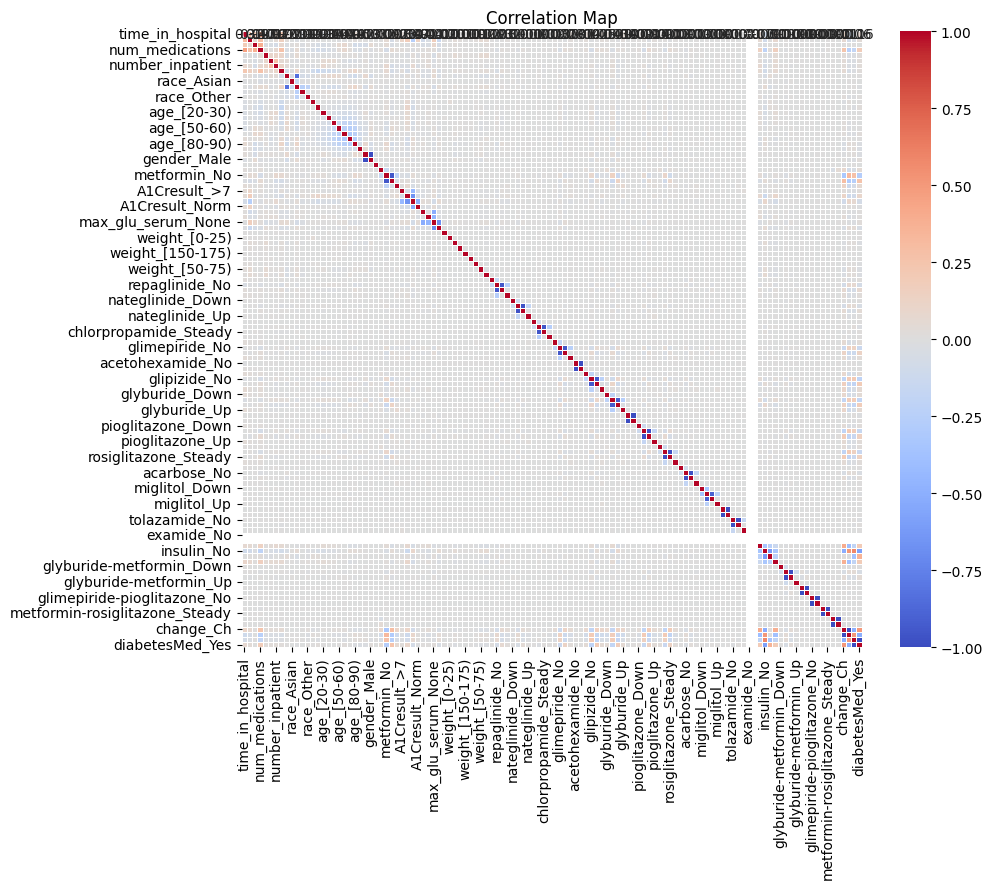

In [44]:
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Map')
plt.show()

In [45]:
data['diabetesMed_Yes'].unique()

array([0, 1], dtype=uint8)

In [46]:
data['diabetesMed_Yes'].value_counts()

1    78363
0    23403
Name: diabetesMed_Yes, dtype: int64

In [47]:
positive = data[data['diabetesMed_Yes'] == 1]
negative = data[data['diabetesMed_Yes'] == 0]

target_positive = int(len(negative) / 0.4 * 0.6)

# Sample the entire positive class without replacement
positive_sample = positive.sample(target_positive, replace=False)

# Concatenate the sampled positive class with the negative class
balanced_data = pd.concat([positive_sample, negative])

# Shuffle the data
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)


print("\nBalanced Data Class Distribution:")
print(balanced_data['diabetesMed_Yes'].value_counts())


Balanced Data Class Distribution:
1    35104
0    23403
Name: diabetesMed_Yes, dtype: int64


In [48]:
percentage_positive = (balanced_data['diabetesMed_Yes'].value_counts()[1] / len(balanced_data)) * 100
percentage_negative = (balanced_data['diabetesMed_Yes'].value_counts()[0] / len(balanced_data)) * 100

print(f"\nPercentage of Patients With Diabetes Medication : {percentage_positive:.2f}%")
print(f"Percentage of Patients Without Diabetes Medication : {percentage_negative:.2f}%")


Percentage of Patients With Diabetes Medication : 60.00%
Percentage of Patients Without Diabetes Medication : 40.00%


### Data Preprocessing

In [49]:
X = balanced_data.drop('diabetesMed_Yes',axis=1)
y = balanced_data['diabetesMed_Yes']

In [50]:
scaler=StandardScaler()
x_std=scaler.fit_transform(X)
x_std

array([[ 3.27532942,  1.03108993,  1.56657275, ...,  1.33762301,
        -1.33762301, -0.8165024 ],
       [ 0.57337502,  0.10884827,  1.56657275, ..., -0.7475948 ,
         0.7475948 ,  1.22473615],
       [-0.43985787, -0.86462902, -0.19978032, ..., -0.7475948 ,
         0.7475948 , -0.8165024 ],
       ...,
       [-1.11534647, -0.09609431, -0.78856467, ..., -0.7475948 ,
         0.7475948 , -0.8165024 ],
       [-0.10211357,  1.33850381,  0.38900404, ...,  1.33762301,
        -1.33762301, -0.8165024 ],
       [ 1.24886362,  0.87738298,  0.97778839, ...,  1.33762301,
        -1.33762301, -0.8165024 ]])

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.25)
print('x_train:',x_train.shape)
print('x_test:',x_test.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)

x_train: (43880, 117)
x_test: (14627, 117)
y_train: (43880,)
y_test: (14627,)


## SVM

### Model Generation SVM - Linear

In [52]:
classifier=svm.SVC(kernel='linear')
classifier.fit(x_train,y_train)

SVC(kernel='linear')

### Model Evaluation

In [53]:
prediction=classifier.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 100.0


In [54]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### Model Generation SVM - Poly

In [55]:
classifier_pol=svm.SVC(kernel='poly')
classifier_pol.fit(x_train,y_train)

SVC(kernel='poly')

### Model Evaluation -Poly

In [56]:
prediction=classifier_pol.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 99.97948998427566


In [57]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9998861307219312
Recall: 0.9997722873733349
F1-Score: 0.9998292058070026


### Model Generation SVM - Radial Basis Funct

In [58]:
classifier_rbf=svm.SVC(kernel='rbf')
classifier_rbf.fit(x_train,y_train)

SVC()

### Model Evaluation - Radial Basis Funct

In [59]:
prediction=classifier_rbf.predict(x_test)
testing_data_accuracy =accuracy_score(prediction,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 99.96581664045942


In [60]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9995447302526748
Recall: 0.9998861436866674
F1-Score: 0.9997154078205932


## Naive Bayes

In [61]:
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [62]:
prediction_NB = model.predict(x_test)

In [63]:
testing_data_accuracy =accuracy_score(prediction_NB,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

Accuracy score of testing data: 99.98632665618376


In [64]:
precision = precision_score(y_test, prediction_NB)
recall = recall_score(y_test, prediction_NB)
f1 = f1_score(y_test, prediction_NB)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.9997723392145703
Recall: 1.0
F1-Score: 0.9998861566484517


### PCA

In [65]:
pca = PCA()
pca.fit(balanced_data)
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [66]:
d = np.argmax(cumsum >= 0.95) + 1
d

2

In [67]:
pca = PCA(n_components=d)
pca.fit(balanced_data)

PCA(n_components=2)

In [68]:
# Get the indices of the top features for each component
top_feature_indices = [component.argsort()[-1::-1][:1] for component in pca.components_]

# Get the feature names for the top features of each component
feature_names = list(balanced_data.columns[:-1])  
top_features_names = []

for indices in top_feature_indices:
    top_feature_names = [feature_names[i] for i in indices]
    top_features_names.append(top_feature_names)

In [69]:
top_features_names

[['num_lab_procedures'], ['num_medications']]

In [70]:
numerical_columns = balanced_data.select_dtypes(include=[np.number]).columns
numerical_data = balanced_data[numerical_columns]

### SVM

In [71]:
x_pca = pca.transform(balanced_data)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, balanced_data['diabetesMed_Yes'], test_size=0.2)

classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [ ]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

### Naive Bayes

In [ ]:
model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [ ]:
testing_data_accuracy =accuracy_score(y_pred,y_test)
print("Accuracy score of testing data:",testing_data_accuracy*100)

In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)